In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb

In [9]:
api = wandb.Api()

runs = api.runs('francois-rozet/priors-manifold')

data = []

for run in runs:
    if 'finished' not in run.state:
        continue

    df = run.history()
    df = df[['sigma', 'divergence']]
    df = df[1:]
    df['name'] = run.name

    for key, value in run.config.items():
        df[key] = value

    data.append(df)

df = pd.concat(data)

In [11]:
subset = df[df.components == 256]

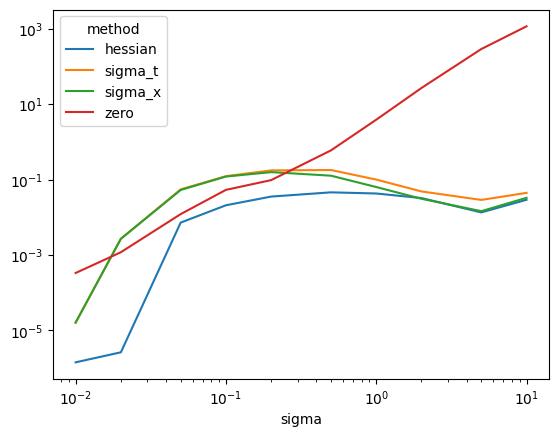

In [13]:
ax = subset.groupby(['method', 'sigma']).divergence.mean().reset_index().pivot(index='sigma', columns='method', values='divergence').plot()
ax.set_xscale('log')
ax.set_yscale('log')

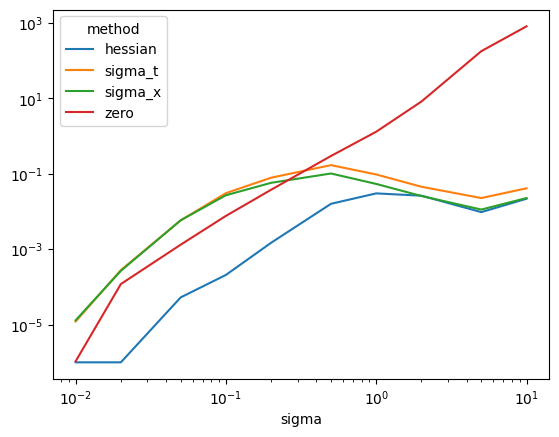

In [12]:
ax = subset.groupby(['method', 'sigma']).divergence.median().reset_index().pivot(index='sigma', columns='method', values='divergence').plot()
ax.set_xscale('log')
ax.set_yscale('log')